In [129]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
img = cv2.imread("./dataset/ms_dhoni/ms_dhoni (58).jpg")
img.shape

(720, 1280, 3)

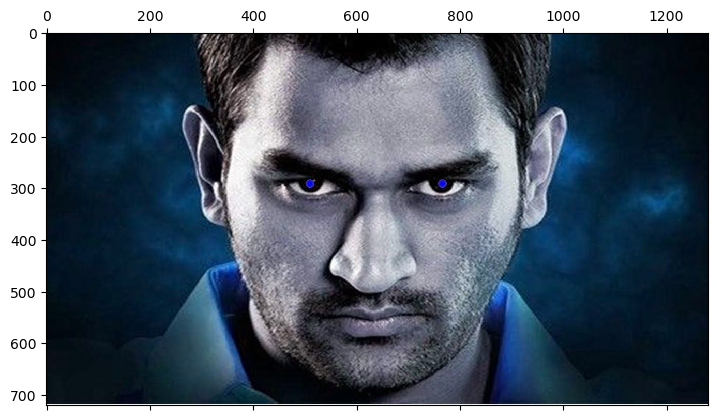

In [131]:
plt.matshow(img)

In [132]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape                                         #multicolor to gray

(720, 1280)

In [133]:
gray

array([[  4,   4,   4, ...,   4,   4,   4],
       [  4,   4,   4, ...,   4,   4,   4],
       [  4,   4,   4, ...,   4,   4,   4],
       ...,
       [ 16,  17,  17, ...,  16,  16,  16],
       [251, 251, 252, ..., 252, 252, 252],
       [252, 253, 253, ..., 253, 253, 253]], dtype=uint8)

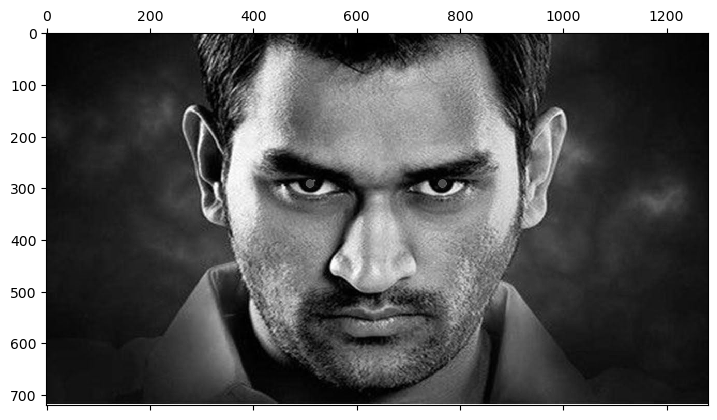

In [134]:
plt.matshow(gray, cmap="gray")

# Data Cleaning

In [135]:
# Dectecting face and cropping the image using opencv haarcascades inbuilt modules

In [136]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")

faces = face_cascade.detectMultiScale(gray)
faces

array([[337,  78, 608, 608]])

In [137]:
(x,y,w,h) = faces[0]            #x-axis, y-axis, width, length of image
x,y,w,h

(337, 78, 608, 608)

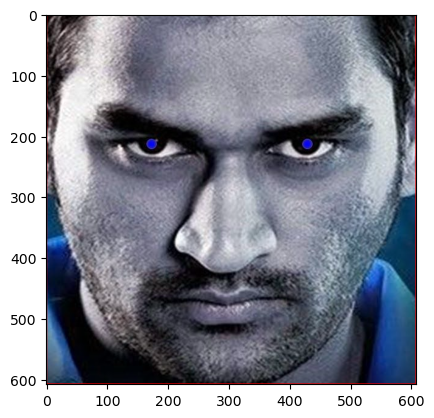

In [138]:
color = (255, 0, 0)
thickness = 2
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),color,thickness)
    roi_color = face_img[y:y+h, x:x+w]

%matplotlib inline
plt.imshow(roi_color, cmap='gray')          #cropped image

In [139]:
def get_cropped_image(image_path):               # function to create crop images by looping over every image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_color = face_img[y:y+h, x:x+w]                #roi - region of interest
        return roi_color
        

In [140]:
path_to_data = "./dataset/"                                   #path for original images
path_to_crop_data = "./dataset/cropped_images/"                      #path for cropped images

In [141]:
import os                                                     #listing all directories/classes inside our dataset
img_dir = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dir.append(entry.path)

In [142]:
img_dir

['./dataset/ms_dhoni',
 './dataset/rohit_sharma',
 './dataset/sachin_tendulkar',
 './dataset/virat_kohli',
 './dataset/yuvraj_singh']

In [143]:
import shutil
if os.path.exists(path_to_crop_data):                       #if cropped images folder already exists then delete that folder(in case of multiple running of program)
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)                                 #create a new folder for cropped images

In [144]:
cropped_images_dirs = [] #list of all individual players folder to be created inside cropped images
cricket_player_file_names_dict = {}       #dict for all players files with individual file paths
for img_dir in img_dir:
    count = 1
    cricket_player_name = img_dir.split('/')[-1]          #getting the names of cricket player from img_dir path name
    print(cricket_player_name)
    
    cricket_player_file_names_dict[cricket_player_name] = []    #list of players respective file's paths
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)           #iterating over each folder & creating cropped images
        if roi_color is not None:
            cropped_folder = path_to_crop_data + cricket_player_name            #if there are cropped images then saving them inside cropped images folder with each individual dir with their names
            if not os.path.exists(cropped_folder):                              #if individual folders doesn't exist the create them
                os.makedirs(cropped_folder)
                cropped_images_dirs.append(cropped_folder)
                print(f"Generating cropped images in folder: {cropped_folder}")
             
            cropped_file_name = cricket_player_name + str(count) + ".png"          #naming the cropped file
            cropped_file_path = cropped_folder + "/" + cropped_file_name           #giving path anme to the cropped file
            
            cv2.imwrite(cropped_file_path, roi_color)  #saving the cropped file to the cropped images folder by writing to it
            cricket_player_file_names_dict[cricket_player_name].append(cropped_file_path)          #adding paths to the list of players individuls files
            count+=1

ms_dhoni
Generating cropped images in folder: ./dataset/cropped_images/ms_dhoni
rohit_sharma
Generating cropped images in folder: ./dataset/cropped_images/rohit_sharma
sachin_tendulkar
Generating cropped images in folder: ./dataset/cropped_images/sachin_tendulkar
virat_kohli
Generating cropped images in folder: ./dataset/cropped_images/virat_kohli
yuvraj_singh
Generating cropped images in folder: ./dataset/cropped_images/yuvraj_singh


In [145]:
# manual cleaning in case of more unnecessary files left in folder

In [146]:
# after manual cleaning, sequencing all images in croped folder in continuous order again

In [147]:
cricket_player_file_names_dict = {}
for img_dir in cropped_images_dirs:
    cricket_player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    cricket_player_file_names_dict[cricket_player_name] = file_list

cricket_player_file_names_dict

{'ms_dhoni': ['./dataset/cropped_images/ms_dhoni\\ms_dhoni1.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni10.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni100.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni101.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni102.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni103.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni104.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni105.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni106.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni107.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni109.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni11.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni110.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni111.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni114.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni115.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni116.png',
  './dataset/cropped_images/ms_dhoni\\ms

In [148]:
#wavlength transformation - that allows to extract important features from the face

In [149]:
import numpy as np
import pywt
import cv2

In [150]:
def w2d(img, mode="haar", level=1):
    imarray = img
    #data type conversion
    #covert to gray
    imarray = cv2.cvtColor(imarray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imarray = np.float32(imarray)
    imarray /= 255;
    #coefficients
    coeffs = pywt.wavedec2(imarray, mode, level=1)
    
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imarray_H = pywt.waverec2(coeffs_H, mode);
    imarray_H *= 255;
    imarray_H =  np.uint8(imarray_H)
    
    return imarray_H

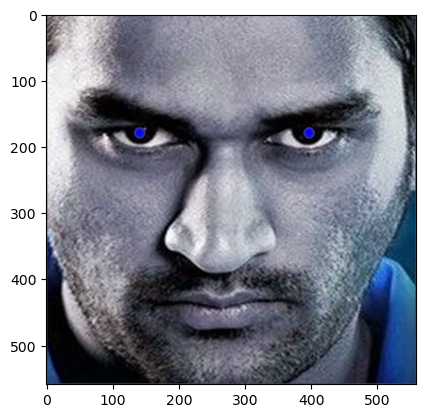

In [154]:
# for one image 
cropped_image = get_cropped_image("./dataset/ms_dhoni/ms_dhoni (58).jpg")
plt.imshow(cropped_image)

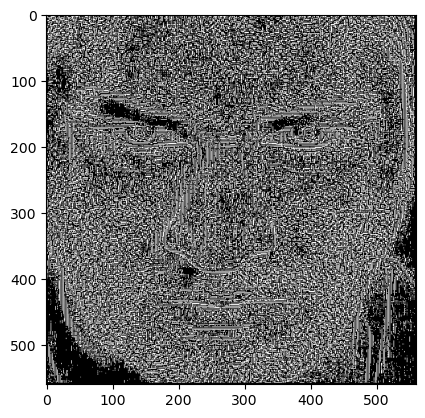

In [155]:
im_har = w2d(cropped_image, "db1", 5)
plt.imshow(im_har, cmap="gray")

In [156]:
#code for vertically stacking both the original image and wavelength image so that we can train our model with all possible features

In [157]:
cricket_player_file_names_dict        #all players with their cropped images

{'ms_dhoni': ['./dataset/cropped_images/ms_dhoni\\ms_dhoni1.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni10.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni100.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni101.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni102.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni103.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni104.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni105.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni106.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni107.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni109.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni11.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni110.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni111.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni114.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni115.png',
  './dataset/cropped_images/ms_dhoni\\ms_dhoni116.png',
  './dataset/cropped_images/ms_dhoni\\ms

In [158]:
class_dict = {}                                    # assigning each player with a class number so that we can use them in our y (dependent varibale)
count = 0
for cricket_player_name in cricket_player_file_names_dict.keys():
    class_dict[cricket_player_name] = count
    count = count + 1
class_dict

{'ms_dhoni': 0,
 'rohit_sharma': 1,
 'sachin_tendulkar': 2,
 'virat_kohli': 3,
 'yuvraj_singh': 4}

In [159]:
x = []           #creating independent and dependent variables
y = []

for cricket_player_name, training_files in cricket_player_file_names_dict.items():    #iterating over each files in dict
    for training_image in training_files:                       #iterating over each image file
        img = cv2.imread(training_image)                        #reading each image i.e coverting to dimensions
        
        if img is None:
            continue
        
        scalled_raw_img = cv2.resize(img, (32,32))              # resizing each original cropped image into one size for all
        
        img_har = w2d(img, "db1", 5)                            #converting each original cropped image to wavelength 
        scalled_har_img = cv2.resize(img_har, (32,32))          #resizing ech wv image imto one size for all
        
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_har_img.reshape(32*32,1)))           #vertically stacking both original cropped image (resized) & wv image(resized)
        
        x.append(combined_img)
        y.append(class_dict[cricket_player_name])

In [161]:
len(x)         #total images

2349

In [162]:
len(x[0])      #(32*32*3) + (32*32)    ie (x*y*RGB) for raw image and another (32*32) for wv image

4096

In [163]:
x[0]

array([[177],
       [206],
       [213],
       ...,
       [100],
       [  0],
       [ 89]], dtype=uint8)

In [164]:
 # to check the shape of x we need to convert the list into array

In [165]:
x = np.array(x).reshape((len(x), 4096)).astype(float)
x.shape

(2349, 4096)

In [166]:
x[0]

array([177., 206., 213., ..., 100.,   0.,  89.])

In [167]:
#convert y - list to array

In [168]:
y = np.array(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [169]:
y.shape

(2349,)

# Splitting into train-test part

In [170]:
#K fold technique

In [171]:
type(x)

numpy.ndarray

In [172]:
type(y)

numpy.ndarray

In [173]:
x.ndim, y.ndim

(2, 1)

In [174]:
from sklearn.model_selection import KFold

In [175]:
k = KFold(n_splits=3)
k

KFold(n_splits=3, random_state=None, shuffle=False)

In [176]:
for train_index, test_index in k.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 783  784  785 ... 2346 2347 2348] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [177]:
# to check cross validation score using Support Vector Machine (SVM)

In [178]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [179]:
cross_val_score(SVC(), x,y)                   # cross validation score using SVC algorithm

array([1.        , 0.99787234, 1.        , 1.        , 1.        ])

# Optimizing our model using Hyperparameter tuning - Gridsearchmethod

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
model = GridSearchCV(SVC(), param_grid={'C': [1, 5, 11, 25, 55], 'kernel': ('linear', 'rbf')}, cv=5)

In [222]:
model.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 11, 25, 55], 'kernel': ('linear', 'rbf')})

In [183]:
model.cv_results_

{'mean_fit_time': array([1.75686727, 2.42537436, 1.29751816, 1.4059216 , 1.23258252,
        1.41308579, 1.40724545, 1.6076055 , 1.22470999, 1.39583316]),
 'std_fit_time': array([0.13774399, 0.38565441, 0.09809516, 0.00988174, 0.01746941,
        0.00895929, 0.12772563, 0.30950519, 0.0076525 , 0.01203713]),
 'mean_score_time': array([0.24282651, 0.87289839, 0.16031919, 0.37804637, 0.15620632,
        0.37189903, 0.20127783, 0.41031628, 0.15933886, 0.37491069]),
 'std_score_time': array([1.50071714e-02, 1.54851957e-01, 6.89449780e-03, 6.24213391e-03,
        9.87986601e-03, 6.30553086e-03, 3.40523694e-02, 5.56251310e-02,
        1.16897866e-02, 4.04216184e-06]),
 'param_C': masked_array(data=[1, 1, 5, 5, 11, 11, 25, 25, 55, 55],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 'rbf',
            

In [184]:
model.best_params_

{'C': 1, 'kernel': 'linear'}

In [185]:
model.best_score_

0.9995744680851064

In [186]:
#SVM technique

In [187]:
# training and testing part

In [188]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [190]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 10))])   #scaling the model and creating model using SVC
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

1.0

In [191]:
len(x_test)

588

In [192]:
pipe.predict(x_test)

array([0, 4, 0, 4, 3, 2, 2, 1, 0, 0, 1, 1, 1, 4, 2, 0, 1, 4, 3, 2, 2, 1,
       3, 1, 3, 2, 4, 0, 1, 4, 4, 2, 3, 3, 4, 2, 1, 0, 0, 0, 4, 1, 0, 3,
       4, 2, 1, 2, 2, 4, 0, 2, 2, 4, 2, 1, 1, 0, 4, 3, 3, 1, 2, 2, 2, 3,
       2, 4, 4, 3, 2, 3, 1, 3, 2, 1, 1, 0, 0, 1, 4, 2, 1, 4, 0, 4, 1, 2,
       0, 3, 2, 1, 0, 1, 0, 3, 1, 2, 2, 1, 2, 4, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 3, 2, 2, 0, 3, 3, 0, 3, 0, 1, 3, 2, 1, 1, 4, 3, 1, 0, 4, 1, 0,
       1, 1, 1, 4, 1, 0, 3, 1, 4, 1, 2, 1, 2, 3, 4, 0, 4, 1, 2, 4, 3, 1,
       3, 4, 3, 1, 4, 4, 3, 1, 3, 3, 4, 3, 4, 3, 2, 2, 1, 0, 1, 4, 4, 0,
       3, 3, 2, 4, 1, 3, 3, 0, 3, 2, 1, 3, 2, 3, 2, 1, 4, 4, 3, 3, 3, 3,
       1, 2, 2, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 2, 3, 1, 4, 4, 4, 3, 2, 3,
       3, 1, 3, 1, 2, 3, 0, 1, 1, 3, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 1, 3,
       1, 3, 4, 4, 4, 1, 1, 3, 2, 4, 2, 2, 2, 0, 4, 1, 1, 2, 4, 4, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 4, 1, 0, 0, 2, 4, 3, 4, 4, 1, 1, 3, 4, 2,
       4, 2, 4, 0, 2, 1, 2, 4, 1, 1, 1, 2, 0, 2, 1,

In [193]:
y_test

array([0, 4, 0, 4, 3, 2, 2, 1, 0, 0, 1, 1, 1, 4, 2, 0, 1, 4, 3, 2, 2, 1,
       3, 1, 3, 2, 4, 0, 1, 4, 4, 2, 3, 3, 4, 2, 1, 0, 0, 0, 4, 1, 0, 3,
       4, 2, 1, 2, 2, 4, 0, 2, 2, 4, 2, 1, 1, 0, 4, 3, 3, 1, 2, 2, 2, 3,
       2, 4, 4, 3, 2, 3, 1, 3, 2, 1, 1, 0, 0, 1, 4, 2, 1, 4, 0, 4, 1, 2,
       0, 3, 2, 1, 0, 1, 0, 3, 1, 2, 2, 1, 2, 4, 1, 1, 2, 2, 1, 0, 4, 2,
       1, 3, 2, 2, 0, 3, 3, 0, 3, 0, 1, 3, 2, 1, 1, 4, 3, 1, 0, 4, 1, 0,
       1, 1, 1, 4, 1, 0, 3, 1, 4, 1, 2, 1, 2, 3, 4, 0, 4, 1, 2, 4, 3, 1,
       3, 4, 3, 1, 4, 4, 3, 1, 3, 3, 4, 3, 4, 3, 2, 2, 1, 0, 1, 4, 4, 0,
       3, 3, 2, 4, 1, 3, 3, 0, 3, 2, 1, 3, 2, 3, 2, 1, 4, 4, 3, 3, 3, 3,
       1, 2, 2, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 2, 3, 1, 4, 4, 4, 3, 2, 3,
       3, 1, 3, 1, 2, 3, 0, 1, 1, 3, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1, 1, 3,
       1, 3, 4, 4, 4, 1, 1, 3, 2, 4, 2, 2, 2, 0, 4, 1, 1, 2, 4, 4, 0, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 4, 1, 0, 0, 2, 4, 3, 4, 4, 1, 1, 3, 4, 2,
       4, 2, 4, 0, 2, 1, 2, 4, 1, 1, 1, 2, 0, 2, 1,

In [194]:
pipe.predict(x_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [195]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       135
           2       1.00      1.00      1.00       129
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       114

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588



In [196]:
# Hypertuning using Gridsearchcv

In [197]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [198]:
#defining different models

In [199]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [200]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.999432,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,1.000000,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.999432,{'logisticregression__C': 1}


In [201]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [202]:
best_estimators['svm'].score(x_test, y_test)

1.0

In [203]:
best_estimators['random_forest'].score(x_test, y_test)

1.0

In [204]:
best_estimators['logistic_regression'].score(x_test, y_test)

1.0

In [205]:
best_clf = best_estimators['svm']

In [206]:
from sklearn.metrics import confusion_matrix

In [207]:
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 90,   0,   0,   0,   0],
       [  0, 135,   0,   0,   0],
       [  0,   0, 129,   0,   0],
       [  0,   0,   0, 120,   0],
       [  0,   0,   0,   0, 114]], dtype=int64)

In [208]:
#Plotting confusion matrix in better way using seaborn

In [209]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

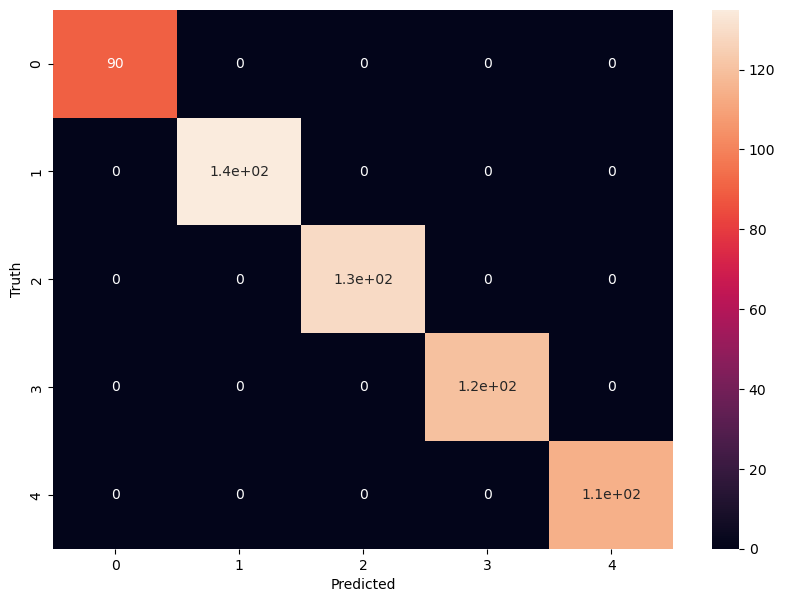

In [210]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [211]:
#saving the trained model as pickle file

In [212]:
#Deploying model

In [213]:
!pip install joblib
import joblib

Defaulting to user installation because normal site-packages is not writeable


In [214]:
joblib.dump(best_clf, 'cricket_player_image_classification_model.pkl')

['cricket_player_image_classification_model.pkl']

In [215]:
#save class dictionary to use in python file

In [216]:
class_dict

{'ms_dhoni': 0,
 'rohit_sharma': 1,
 'sachin_tendulkar': 2,
 'virat_kohli': 3,
 'yuvraj_singh': 4}

In [217]:
import json

In [218]:
with open('cricket_players_class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))